## Importar librerias
Las siguientes lineas listan las librerias utilizadas en el desarrollo


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import os
import math
import openpyxl


## Identificando la correlación
En la siguiente linea de codigo se identificará la correlación entre las variables edad y ausencias de estudio


In [81]:
def Load_Data(File , tipo ):
    if tipo == 1:
        df = pd.read_csv(File, sep=';')
    else:
        df = pd.read_excel(File)
    return df

def Load_Data_FeatureTarge(Namex ,Namey , File , tipo):
    df = Load_Data(File, tipo)
    print ("Cargando datos de:", File)
    x = df[Namex]   
    y = df[Namey]
    return x , y


In [11]:
#. Funcion de regresión lineal de polynomial
def f_Potencia(x_n, c_k):
    return x_n ** c_k -1

# funciones de regresión lineal de Gaussianas
def f_Gaussiana(x_n, c_k, sigma=0.1):
    return math.exp(-((x_n - c_k) ** 2) / (2 * sigma ** 2))

# función de regresión lineal sigmoide desplazada
def f_Sigmoide(x_n, c_k):  
    return 1 / (1 + math.exp(- (x_n - c_k)))    


In [10]:
def call_function(func_name, x_base, x_train ,y_train, K):
    # Diccionario de funciones disponibles
    
    functions = {
        'Potencia': f_Potencia,
        'Gaussiana': f_Gaussiana,
        'Sigmoide': f_Sigmoide
    }
    
    if func_name not in functions:
        raise ValueError(f"La función '{func_name}' no está definida.")
    
    func = functions[func_name]  # Recuperar la función real
    
    N = len(x_train)

    Phi = np.zeros((N, K))  # Matriz de diseño
    for n in range(N):
        for k in range(K):
            Phi[n, k] = func(x_train[n], k)  # Llamar la función real
    # Calcular los pesos usando pseudoinversa
    w = np.linalg.pinv(Phi) @ y_train

    N_test = len(x_base)
    Phi_base = np.zeros((N_test, K))
    for n in range(N_test):
        for k in range(K):
            Phi_base[n, k] = func(x_base[n], k)  


    yhat = Phi_base @ w
    return yhat , w 


In [16]:
def f_Potencia(x_n, c_k):
    return x_n ** c_k -1

# funciones de regresión lineal de Gaussianas
def f_Gaussiana(x_n, c_k, sigma=0.1):
    return math.exp(-((x_n - c_k) ** 2) / (2 * sigma ** 2))

# función de regresión lineal sigmoide desplazada
def f_Sigmoide(x_n, c_k):  
    return 1 / (1 + math.exp(- (x_n - c_k)))    


def call_function(func_name, x_base, x_train ,y_train, K):
    # Diccionario de funciones disponibles
    
    functions = {
        'Potencia': f_Potencia,
        'Gaussiana': f_Gaussiana,
        'Sigmoide': f_Sigmoide
    }
    
    if func_name not in functions:
        raise ValueError(f"La función '{func_name}' no está definida.")
    
    func = functions[func_name]  # Recuperar la función real
    
    N = len(x_train)

    Phi = np.zeros((N, K))  # Matriz de diseño
    for n in range(N):
        for k in range(K):
            Phi[n, k] = func(x_train[n], k)  # Llamar la función real
    # Calcular los pesos usando pseudoinversa
    w = np.linalg.pinv(Phi) @ y_train

    N_test = len(x_base)
    Phi_base = np.zeros((N_test, K))
    for n in range(N_test):
        for k in range(K):
            Phi_base[n, k] = func(x_base[n], k)  


    yhat = Phi_base @ w
    return yhat , w 


def Load_Data(File , tipo ):
    if tipo == 1:
        df = pd.read_csv(File, sep=';')
    else:
        df = pd.read_excel(File)
    return df

def Load_Data_FeatureTarge(Namex ,Namey , File , tipo):

    df = Load_Data(File, tipo)
    print ("Cargando datos de:", File)
    x = df[Namex] 
    y = (df['G3'] >= 10).astype(int) 
    return x , y


File = "data/student-mat.csv"
Namex = ['age', 'absences']
Namey = 'G3' 
function = 'Potencia'

x_base , y_base = Load_Data_FeatureTarge(Namex, Namey, File , 1)

print(f"x_base: {x_base.shape}")
print(f"y_base: {y_base.shape}")
# Convertir a numpy arrays
x_base = np.array(x_base)
y_base = np.array(y_base)

alpha = 0.7
index_total = np.random.permutation(len(x_base))

# 70% de los datos para entrenamiento y 30% para test
x_train = x_base[index_total[:round(alpha * len(x_base))]]
y_train = y_base[index_total[:round(alpha * len(x_base))]]
x_test = x_base[index_total[round(alpha * len(x_base)):]]
y_test = y_base[index_total[round(alpha * len(x_base)):]]


K = 7

yhattrain , wtrain = call_function(function, x_base,x_train, y_train, K)

plt.plot(x_base, yhattrain, color='blue', label='Datos de entrenamiento')
plt.scatter(x_train, y_train, color='orange', label='Datos de prueba')
plt.xlabel(Namex)
plt.ylabel(Namey)
plt.title('Datos de entrenamiento y prueba con predicciones')
plt.legend()
plt.show()

Cargando datos de: data/student-mat.csv
x_base: (395, 2)
y_base: (395,)


ValueError: setting an array element with a sequence.

Exactitud (accuracy): 0.6708860759493671
Matriz de confusión:
 [[ 2 25]
 [ 1 51]]


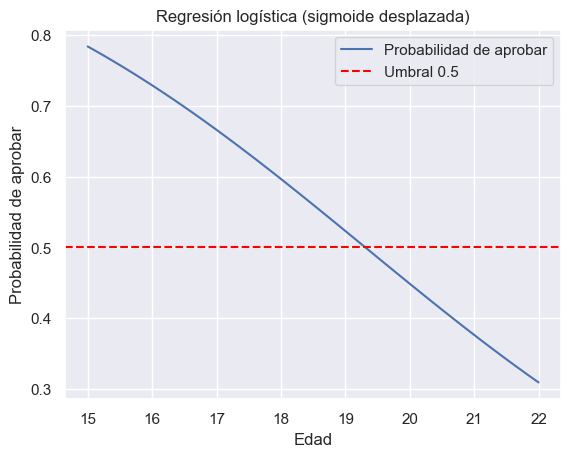

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Cargar el archivo
df = pd.read_csv("data/student-mat.csv", sep=';')

# 2. Variables de entrada y objetivo
X = df[['age', 'absences']]
y = (df['G3'] >= 10).astype(int)  # 1 = aprobado, 0 = reprobado

# 3. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probabilidades de aprobar

# 6. Evaluación
print("Exactitud (accuracy):", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

# 7. Visualización de la sigmoide desplazada para una variable
age_range = np.linspace(X['age'].min(), X['age'].max(), 100)
absences_fixed = X['absences'].median()

X_plot = pd.DataFrame({
    'age': age_range,
    'absences': [absences_fixed] * len(age_range)
})
prob_aprobar = model.predict_proba(X_plot)[:, 1]

plt.plot(age_range, prob_aprobar, label='Probabilidad de aprobar')
plt.axhline(0.5, color='red', linestyle='--', label='Umbral 0.5')
plt.xlabel('Edad')
plt.ylabel('Probabilidad de aprobar')
plt.title('Regresión logística (sigmoide desplazada)')
plt.legend()
plt.grid(True)
plt.show()


Cargando datos de: data/student-mat.csv
x_base: (395, 2)
y_base: (395,)


/Users/carlosandresarroyaveoutlook.com/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/carlosandresarroyaveoutlook.com/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/carlosandresarroyaveoutlook.com/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)
/var/folders/dt/78p3_sjj4sqf7t0558_m7vvc0000gn/T/ipykernel_70192/1972344452.py:70: RuntimeWarning: divide by zero encountered in matmul
  yhat = Phi_base @ w
/var/folders/dt/78p3_sjj4sqf7t0558_m7vvc0000gn/T/ipykernel_70192/1972344452.py:70: RuntimeWarning: overflow encountered in matmul
  yhat = Phi_base @ w
/var/folders/dt/78p3_sjj4sqf7t0558_m7vvc0000gn/T/ipykernel_70192/1972344452.py:70: RuntimeWarning: invalid va

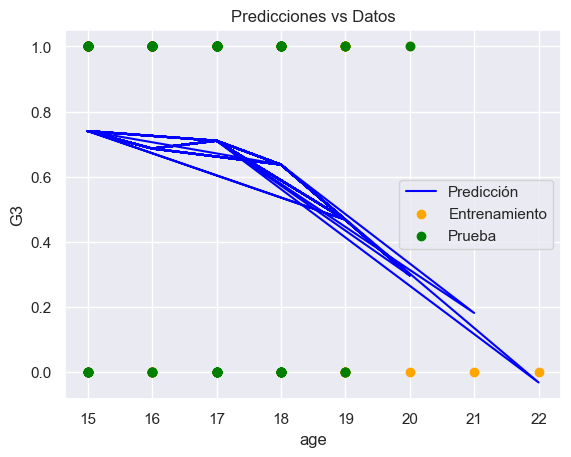

In [17]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


# ==============================
# Funciones base
# ==============================

def f_Potencia(x_n, c_k):
    """Función base Potencia: x^c - 1"""
    return x_n ** c_k - 1

def f_Gaussiana(x_n, c_k, sigma=0.1):
    """Función Gaussiana: exp(-((x - c)^2) / (2*sigma^2))"""
    return math.exp(-((x_n - c_k) ** 2) / (2 * sigma ** 2))

def f_Sigmoide(x_n, c_k):
    """Función Sigmoide desplazada: 1 / (1 + exp(-(x - c)))"""
    return 1 / (1 + math.exp(-(x_n - c_k)))


# ==============================
# Llamada genérica a funciones
# ==============================

def call_function(func_name, x_base, x_train, y_train, K):
    """
    Construye la matriz de diseño Phi para la función indicada y calcula los pesos w.
    Retorna las predicciones para x_base y el vector de pesos.
    """
    # Diccionario de funciones disponibles
    functions = {
        'Potencia': f_Potencia,
        'Gaussiana': f_Gaussiana,
        'Sigmoide': f_Sigmoide
    }
    
    if func_name not in functions:
        raise ValueError(f"La función '{func_name}' no está definida.")
    
    func = functions[func_name]

    # Si x es multidimensional, tomar solo una columna para la base
    if x_train.ndim > 1 and x_train.shape[1] > 1:
        x_train_1d = x_train[:, 0]
        x_base_1d = x_base[:, 0]
    else:
        x_train_1d = x_train
        x_base_1d = x_base

    # Matriz Phi para entrenamiento
    N = len(x_train_1d)
    Phi = np.zeros((N, K))
    for n in range(N):
        for k in range(K):
            Phi[n, k] = func(x_train_1d[n], k)
    
    # Calcular pesos con pseudoinversa
    w = np.linalg.pinv(Phi) @ y_train

    # Matriz Phi para predicción
    N_test = len(x_base_1d)
    Phi_base = np.zeros((N_test, K))
    for n in range(N_test):
        for k in range(K):
            Phi_base[n, k] = func(x_base_1d[n], k)

    yhat = Phi_base @ w
    return yhat, w


# ==============================
# Carga de datos
# ==============================

def Load_Data(File, tipo):
    """Carga un archivo CSV (tipo=1) o Excel (tipo!=1)."""
    if tipo == 1:
        return pd.read_csv(File, sep=';')
    else:
        return pd.read_excel(File)

def Load_Data_FeatureTarget(Namex, Namey, File, tipo):
    """Carga datos y retorna X (Namex) y Y binarizada (>=10)."""
    df = Load_Data(File, tipo)
    print("Cargando datos de:", File)

    # Validar columnas
    for col in Namex + [Namey]:
        if col not in df.columns:
            raise ValueError(f"La columna '{col}' no existe en el archivo.")

    X = df[Namex]
    y = (df[Namey] >= 10).astype(int)
    return X, y


# ==============================
# Ejecución principal
# ==============================

if __name__ == "__main__":
    File = "data/student-mat.csv"
    Namex = ['age', 'absences']
    Namey = 'G3'
    function = 'Potencia'
    K = 7
    alpha = 0.7

    # Cargar datos
    x_base, y_base = Load_Data_FeatureTarget(Namex, Namey, File, 1)
    print(f"x_base: {x_base.shape}")
    print(f"y_base: {y_base.shape}")

    # Convertir a numpy arrays
    x_base = np.array(x_base)
    y_base = np.array(y_base)

    # Dividir en entrenamiento y prueba
    idx = np.random.permutation(len(x_base))
    train_size = round(alpha * len(x_base))
    x_train = x_base[idx[:train_size]]
    y_train = y_base[idx[:train_size]]
    x_test = x_base[idx[train_size:]]
    y_test = y_base[idx[train_size:]]

    # Entrenar y predecir
    yhattrain, wtrain = call_function(function, x_base, x_train, y_train, K)

    # Graficar
    plt.plot(x_base[:, 0], yhattrain, color='blue', label='Predicción')
    plt.scatter(x_train[:, 0], y_train, color='orange', label='Entrenamiento')
    plt.scatter(x_test[:, 0], y_test, color='green', label='Prueba')
    plt.xlabel(Namex[0])
    plt.ylabel(Namey)
    plt.title('Predicciones vs Datos')
    plt.legend()
    plt.show()
